In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Load the AEP_hourly.csv file
df_aep= pd.read_csv("AEP_hourly.csv")
df_aep.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
df_aep.shape

(121273, 2)

In [4]:
df_aep.dtypes

Datetime     object
AEP_MW      float64
dtype: object

In [5]:
df_aep.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [6]:
df_aep.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [7]:
df_aep['Datetime'] = pd.to_datetime(df_aep['Datetime'])
df_aep['AEP_MW'] = pd.to_numeric(df_aep['AEP_MW'])
df_aep.dtypes

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object

In [8]:
df_aep.dtypes

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object

In [9]:
df_aep['Year'] = df_aep['Datetime'].dt.year
df_aep['Month'] = df_aep['Datetime'].dt.month
df_aep['Day'] = df_aep['Datetime'].dt.day
df_aep['Hour'] = df_aep['Datetime'].dt.hour
df_aep['DayOfWeek'] = df_aep['Datetime'].dt.dayofweek
df_aep['Date'] = df_aep['Datetime'].dt.date

In [10]:
df_aep.head()

,Datetime,AEP_MW,Year,Month,Day,Hour,DayOfWeek,Date
0,2004-12-31 01:00:00,13478.0,2004,12,31,1,4,2004-12-31
1,2004-12-31 02:00:00,12865.0,2004,12,31,2,4,2004-12-31
2,2004-12-31 03:00:00,12577.0,2004,12,31,3,4,2004-12-31
3,2004-12-31 04:00:00,12517.0,2004,12,31,4,4,2004-12-31
4,2004-12-31 05:00:00,12670.0,2004,12,31,5,4,2004-12-31


C:\Users\bhavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

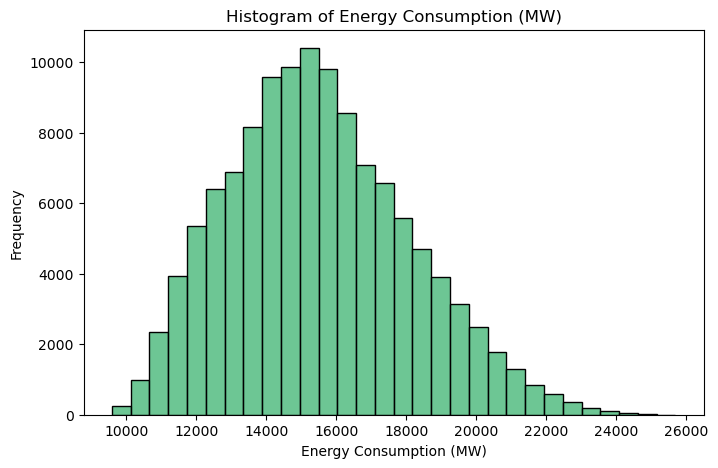

In [11]:
plt.figure(figsize=(8, 5))

sns.histplot(df_aep['AEP_MW'], bins=30, kde=False, color='mediumseagreen')
plt.title('Histogram of Energy Consumption (MW)')
plt.xlabel('Energy Consumption (MW)')
plt.ylabel('Frequency')


The  the positive skewness observed in the histogram indicates that the energy consumption data is right-skewed, with more instances of lower values and a long tail towards higher values.


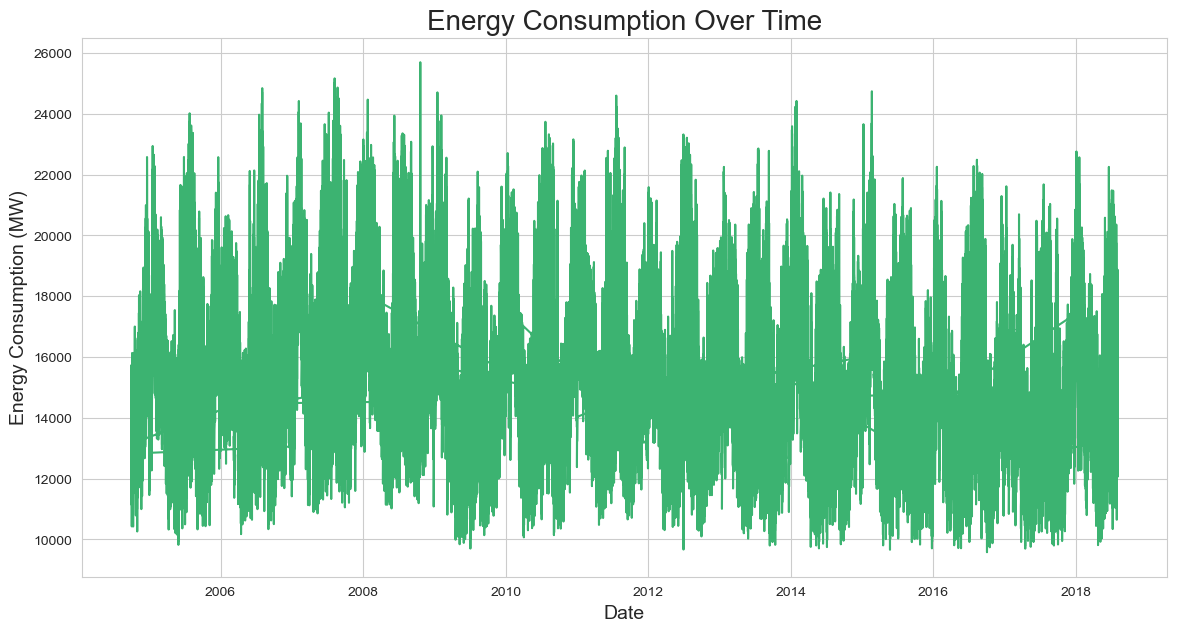

In [12]:
# Plot the energy consumption over time
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
plt.plot(df_aep['Datetime'], df_aep['AEP_MW'], color='mediumseagreen')
plt.title('Energy Consumption Over Time', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy Consumption (MW)', fontsize=14)
plt.show()

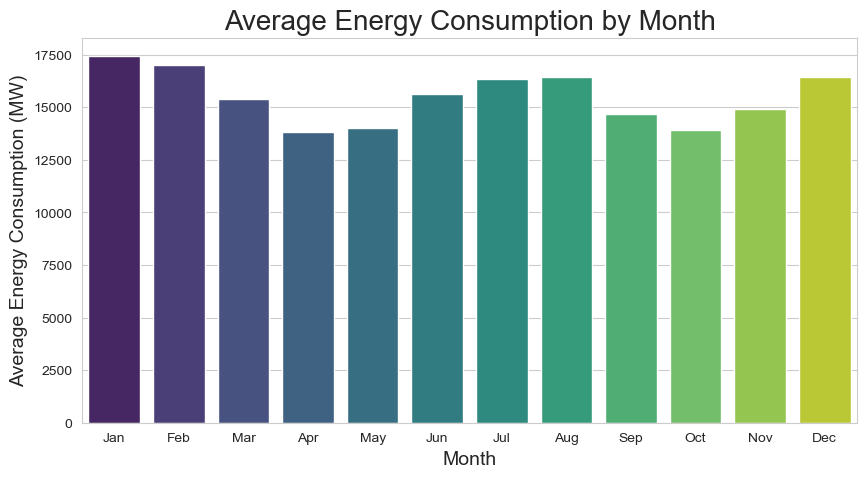

In [13]:
# calculate the average energy consumption by month of the year
plt.figure(figsize=(10, 5))

monthly_avg = df_aep.groupby('Month')['AEP_MW'].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="viridis")
plt.title('Average Energy Consumption by Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption (MW)', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

By the observation, January and February have the highest average energy consumption.and we can analysis

**Winter Season Effect:** These months correspond to the winter season in many parts of the United States. Higher energy consumption during these months is likely due to increased heating needs.

**Holiday Season:** January includes New Year celebrations, which can also contribute to higher energy consumption.

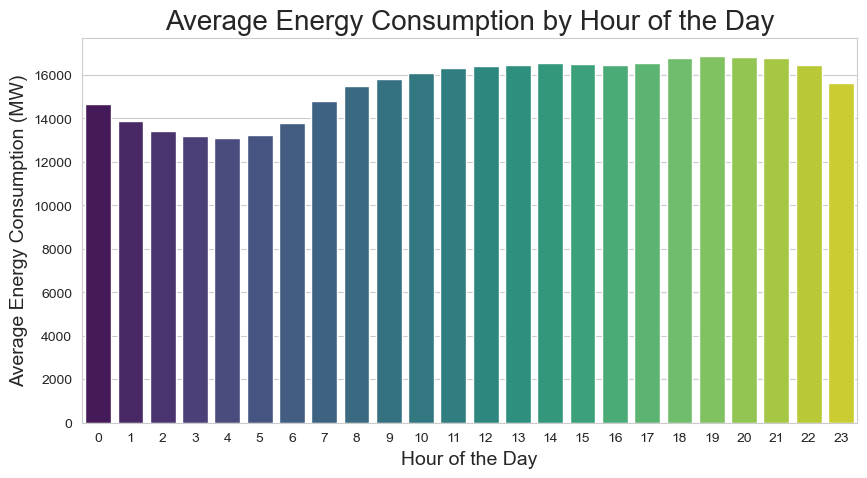

In [14]:
# Plot the average energy consumption by hour of the day
hourly_avg = df_aep.groupby('Hour')['AEP_MW'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette="viridis")
plt.title('Average Energy Consumption by Hour of the Day', fontsize=20)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Energy Consumption (MW)', fontsize=14)
plt.show()

By the graph, we can see evening hours, specifically 18:00 (6:00 PM) and 19:00 (7:00 PM), have higher energy consumption compared to other hours of the day. we can analysis

**Peak Usage Hours:** Many households and businesses are active during the evening hours, leading to higher demand for electricity.
Cooking and Dinner Time: People typically cook dinner and engage in activities that require electrical appliances during these hours, leading to increased energy usage.

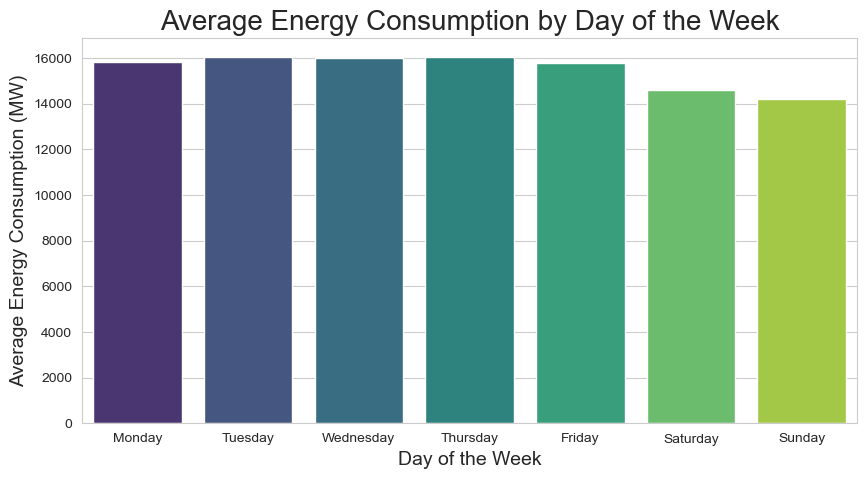

In [15]:
# Plot the average energy consumption by day of the week
dayofweek_avg = df_aep.groupby('DayOfWeek')['AEP_MW'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=dayofweek_avg.index, y=dayofweek_avg.values, palette="viridis")
plt.title('Average Energy Consumption by Day of the Week', fontsize=20)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Energy Consumption (MW)', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

By the observation,Tuesday, Wednesday, and Thursday have higher energy consumption compared to the other days of the week, while the weekends (Saturday and Sunday) have relatively lower consumption. we can analysis

**Workdays vs. Weekends:** Tuesday, Wednesday, and Thursday are typically workdays for most people, with businesses and industries operating at full capacity, resulting in higher energy demand.

**Weekend Leisure:** During weekends, people may engage in leisure activities outside their homes, leading to reduced energy usage for household purposes.

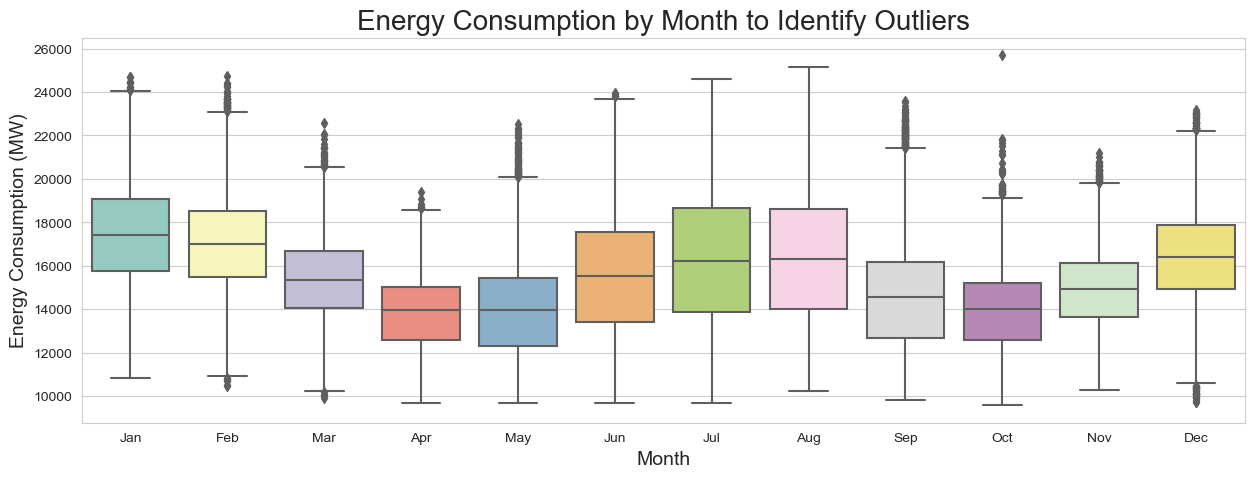

In [16]:
#Energy Consumption by Month to Identify Outliers
plt.figure(figsize=(15, 5))
sns.boxplot(x='Month', y='AEP_MW', data=df_aep, palette='Set3')
plt.title('Energy Consumption by Month to Identify Outliers',  fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy Consumption (MW)', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Model Evaluation

In [17]:
# Split the data into training and test sets
train_df= df_aep[df_aep['Year'] < df_aep['Year'].max()]
test_df = df_aep[df_aep['Year'] == df_aep['Year'].max()]


In [35]:
features = ['Month', 'Day', 'Hour', 'DayOfWeek']
target = 'AEP_MW'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [19]:
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 2295.3654928756036


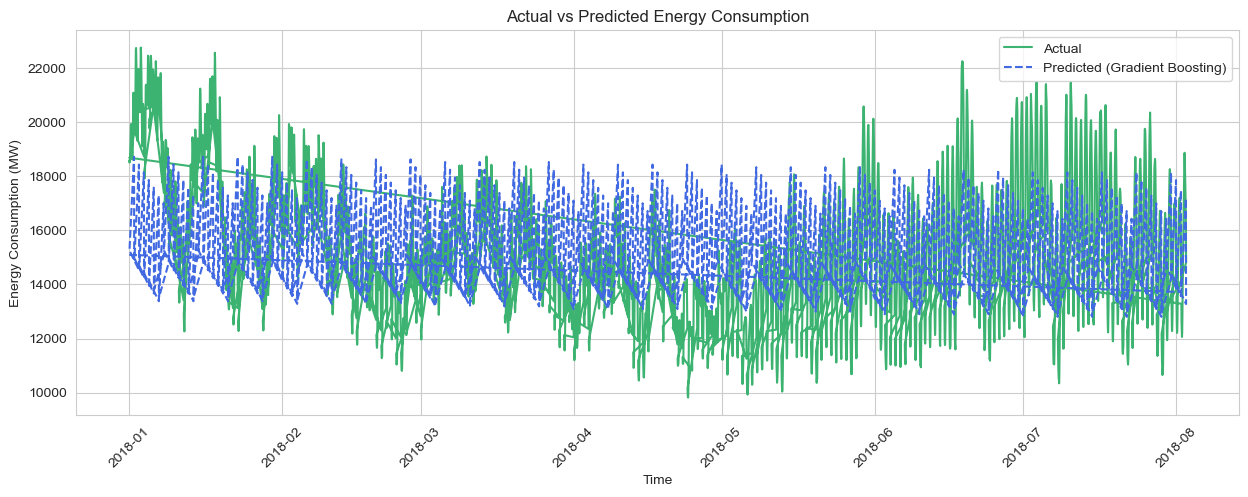

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(test_df['Datetime'], y_test, label='Actual', color='mediumseagreen')
plt.plot(test_df['Datetime'], y_pred, label='Predicted (Gradient Boosting)', color='royalblue', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

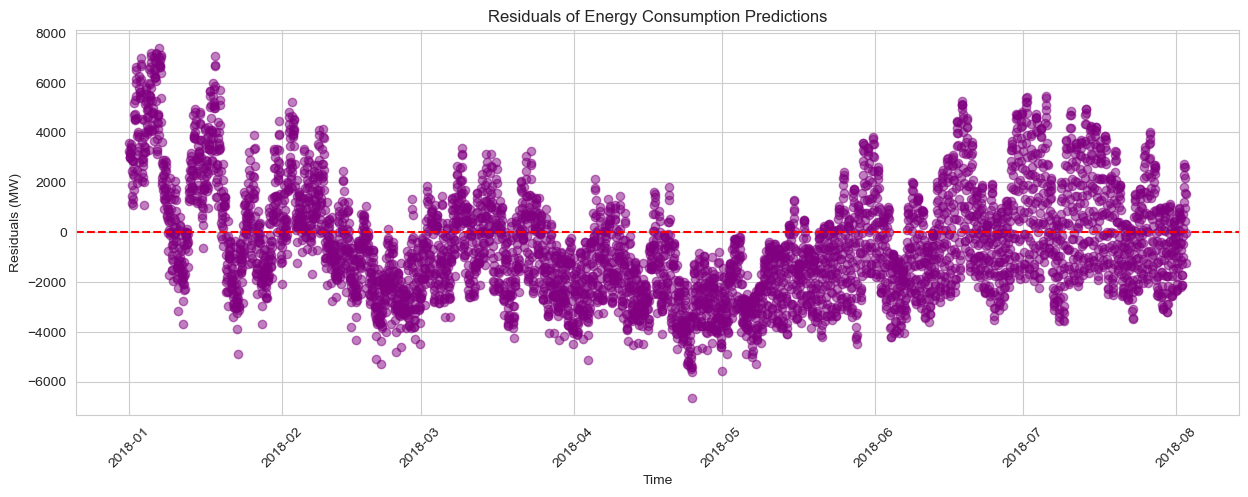

In [24]:
# 7. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(15, 5))
plt.scatter(test_df['Datetime'], residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Energy Consumption Predictions')
plt.xlabel('Time')
plt.ylabel('Residuals (MW)')
plt.xticks(rotation=45)
plt.show()

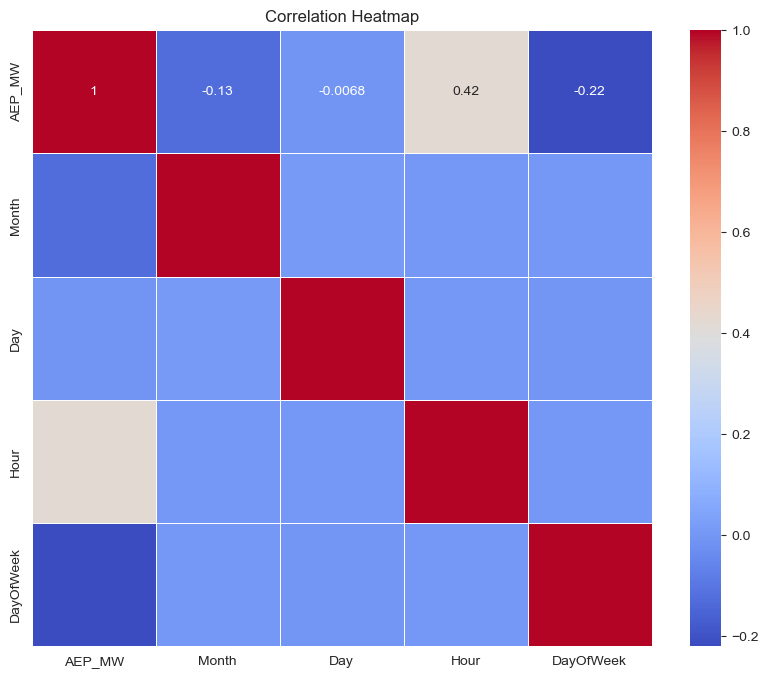

In [36]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_aep[['AEP_MW', 'Month', 'Day', 'Hour', 'DayOfWeek']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

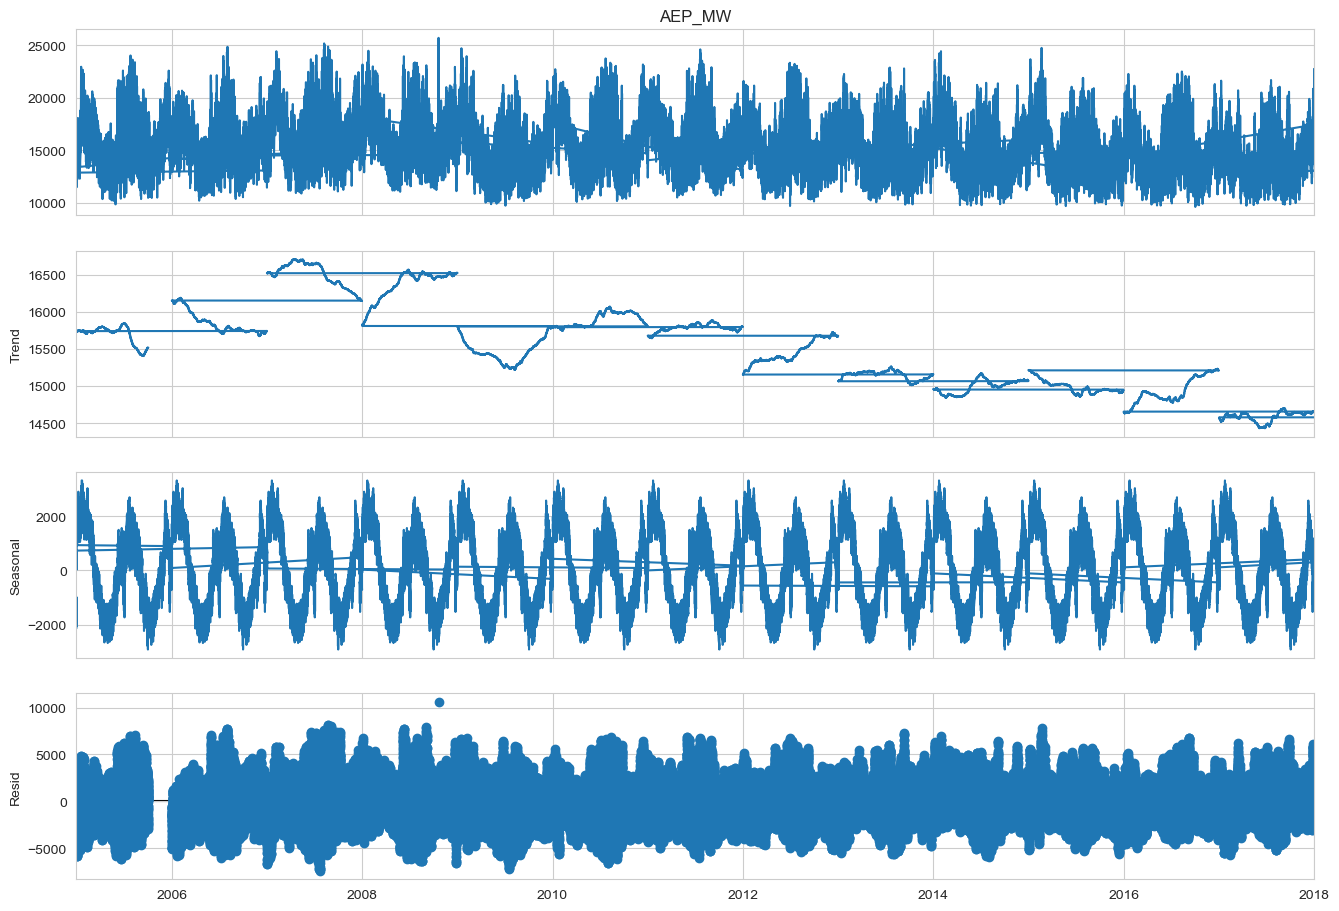

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_aep.set_index('Datetime', inplace=True)
decomposition = seasonal_decompose(df_aep['AEP_MW'], model='additive', period=24*365)
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()